# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import scipy.stats as st
from math import factorial

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

df_plans = pd.read_csv('./datasets/megaline_plans.csv')
df_users = pd.read_csv('./datasets/megaline_users.csv')
df_calls = pd.read_csv('./datasets/megaline_calls.csv')
df_messages = pd.read_csv('./datasets/megaline_messages.csv')
df_internet = pd.read_csv('./datasets/megaline_internet.csv')


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

### **Tarifas**

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-info">
<b>

### El archivo de datos **megaline_plans.csv** contiene las especificaciones de los planes que ofrece la compañia:

1. Surf

* Pago mensual: 20.
* 500 minutos al mes, 50 SMS y 15 GB de datos.
* Si se exceden los límites del paquete:
- 1 minuto: 3 centavos.
- 1 SMS: 3 centavos.
- 1 GB de datos: 10.

2. Ultimate

* Pago mensual: 70.
* 3000 minutos al mes, 1000 SMS y 30 GB de datos.
* Si se exceden los límites del paquete:
- 1 minuto: 1 centavo.
- 1 SMS: 1 centavo.
- 1 GB de datos: 7.

</b> <a class="tocSkip"></a>
</div>



## Corregir datos




<div class="alert alert-block alert-info">
<b>

### No hay datos ausentes ni duplicados

</b> <a class="tocSkip"></a>
</div>


In [5]:

print('Duplicates data',df_plans.duplicated().sum())
print('NaN data:')
df_plans.isna().sum()

Duplicates data 0
NaN data:


messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

## Enriquecer los datos

<div class="alert alert-block alert-info">
<b>


### Igualar el nombre de la columna plane_name en todos los archivos de datos y cambiar el precio de internet a mbytes

</b> <a class="tocSkip"></a>
</div>


In [6]:
df_plans = df_plans.rename(columns={'plan_name': 'plan'})
df_plans = df_plans.rename(columns={'usd_per_gb': 'usd_per_mb'})
#df_plans['usd_per_mb'] = df_plans['usd_per_mb'] * 00.01
df_plans['usd_per_mb'] = df_plans['usd_per_mb'] / 1024    
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_mb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,0.009766,0.03,0.03,surf
1,1000,30720,3000,70,0.006836,0.01,0.01,ultimate


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios

df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<div class="alert alert-block alert-info">
<b>


### Datos sobre los usuarios:

1. user_id: identificador único del usuario.
2. first_name: nombre del usuario.
3. last_name: apellido del usuario.
4. age: edad del usuario (en años).
5. reg_date: fecha de suscripción (dd, mm, aa).
6. churn_date: la fecha en la que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos).
7. city: ciudad de residencia del usuario.
8. plan: nombre de la tarifa.[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

</b> <a class="tocSkip"></a>
</div>

### Corregir los datos

In [9]:
print('Duplicates data',df_users.duplicated().sum())
print('NaN data:')
df_users.isna().sum()

Duplicates data 0
NaN data:


user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

<div class="alert alert-block alert-info">
<b>

### Hay 466 NaN en la columna de chune_date:

La documentación dice que :

'si el valor es ausente, la tarifa se estaba usando cuando fue extraída esta base de datos'

por lo que se puede sustitur por el valor 'in_use'

</b> <a class="tocSkip"></a>
</div>

In [10]:
df_users['churn_date'] = df_users['churn_date'].fillna('in_use')

In [11]:
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,in_use
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,in_use
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,in_use
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,in_use
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,in_use
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,in_use
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,in_use
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,in_use
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,in_use


In [12]:
df_users.isna().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

<div class="alert alert-block alert-info">
<b>

### Enriquecer los datos


Como todos los datos corresponden al mismo año, podemos separar la información solo por mes

</b> <a class="tocSkip"></a>
</div>

In [13]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date']) #datetime format
df_users['reg_month'] = df_users['reg_date'].dt.month #month
#df_users['year'] = df_users['reg_date'].dt.year # year
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,in_use,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,in_use,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,in_use,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,in_use,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,in_use,5
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,in_use,9
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,in_use,2
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,in_use,12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,in_use,2


## Llamadas

In [14]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Imprime una muestra de datos para las llamadas

df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<div class="alert alert-block alert-info">
<b>

### Datos sobre las llamadas realizadas por los usuarios:

1. id: identificador único de la llamada.
2. call_date: fecha de la llamada.
3. duration: duración de la llamada (en minutos).
4. user_id: el identificador del usuario que realiza la llamada.

</b> <a class="tocSkip"></a>
</div>

### Corregir los datos

<div class="alert alert-block alert-info">
<b>

### No hay datos ausentes ni duplicados
</b> <a class="tocSkip"></a>
</div>



In [16]:
print('Duplicates data',df_calls.duplicated().sum())
print('NaN data:')
df_calls.isna().sum()

Duplicates data 0
NaN data:


id           0
user_id      0
call_date    0
duration     0
dtype: int64

### Enriquecer los datos



<div class="alert alert-block alert-info">
<b>

Como todos los datos corresponden al mismo año, podemos separar la información solo por mes
</b> <a class="tocSkip"></a>
</div>

In [17]:
df_calls = df_calls[df_calls['duration'] != 0]
df_calls['call_date'] = pd.to_datetime(df_calls['call_date']) #datetime format
df_calls['call_month'] = df_calls['call_date'].dt.month #month
#df_calls['year'] = df_calls['call_date'].dt.year # year
df_calls

,id,user_id,call_date,duration,call_month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


## Mensajes

In [18]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [19]:
# Imprime una muestra de datos para los mensajes

df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<div class="alert alert-block alert-info">
<b>

### Datos sobre los SMS:

1. id: identificador único del SMS.
2. message_date: fecha del SMS.
3. user_id: el identificador del usuario que manda el SMS.

</b> <a class="tocSkip"></a>
</div>


### Corregir los datos

<div class="alert alert-block alert-info">
<b>



### No hay datos ausentes ni duplicados

</b> <a class="tocSkip"></a>
</div>

In [20]:
print('Duplicates data',df_messages.duplicated().sum())
print('NaN data:')
df_messages.isna().sum()

Duplicates data 0
NaN data:


id              0
user_id         0
message_date    0
dtype: int64

### Enriquecer los datos



<div class="alert alert-block alert-info">
<b>

Como todos los datos corresponden al mismo año, podemos separar la información solo por mes

</b> <a class="tocSkip"></a>
</div>

In [21]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date']) #datetime format
df_messages['message_month'] = df_messages['message_date'].dt.month #month
#df_messages['message_year'] = df_messages['message_date'].dt.year # year
df_messages

,id,user_id,message_date,message_month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [22]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [23]:
# Imprime una muestra de datos para el tráfico de internet

df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<div class="alert alert-block alert-info">
<b>

### Datos sobre el internet

1. id: identificador único de la sesión.
2. mb_used: el volumen de datos gastados durante la sesión (en megabytes).
3. session_date: fecha de la sesión web.
4. user_id: identificador del usuario.

</b> <a class="tocSkip"></a>
</div>

### Corregir los datos

<div class="alert alert-block alert-info">
<b>


### No hay datos ausentes ni duplicados
</b> <a class="tocSkip"></a>
</div>


In [24]:
print('Duplicates data',df_internet.duplicated().sum())
print('NaN data:')
df_internet.isna().sum()

Duplicates data 0
NaN data:


id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

### Enriquecer los datos

<div class="alert alert-block alert-info">
<b>

Como todos los datos corresponden al mismo año, podemos separar la información solo por mes

</b> <a class="tocSkip"></a>
</div>

In [25]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date']) #datetime format
df_internet['session_month'] = df_internet['session_date'].dt.month #month
#df_users['year'] = df_users['reg_date'].dt.year # year
df_internet

,id,user_id,session_date,mb_used,session_month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


<div class="alert alert-block alert-info">
<b>Respuesta al comentario del revisor #2:

Al principio ya convertí el costo que esta en gb a mb para dejar todo, tanto consumo como precio en  mb 
</b> <a class="tocSkip"></a>
</div>

## Estudiar las condiciones de las tarifas

<div class="alert alert-block alert-info">
<b>

### Datos sobre las tarifas:

1. plan_name: nombre de la tarifa.
2. usd_monthly_fee: pago mensual en dólares estadounidenses.
3. minutes_included: minutos incluidos al mes.
4. messages_included: SMS incluidos al mes.
5. mb_per_month_included: datos incluidos al mes (en megabytes).
6. usd_per_minute: precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos, el operador cobrará el minuto 101).
7. usd_per_message: precio por SMS tras exceder los límites del paquete.
8. usd_per_gb: precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes).

</b> <a class="tocSkip"></a>
</div>

In [26]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_mb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,0.009766,0.03,0.03,surf
1,1000,30720,3000,70,0.006836,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [27]:
# Calcula el número de llamadas hechas por cada usuario al mes.
# Guarda el resultado.
df_calls_per_user = pd.merge(df_calls, df_users, on='user_id')
calls_count = df_calls_per_user.groupby('user_id')['call_month'].value_counts()
calls_count

user_id  call_month
1000     12            16
1001     11            49
         10            47
         12            46
         9             38
                       ..
1498     2             28
1499     12            56
         10            41
         11            39
         9             35
Name: count, Length: 2256, dtype: int64

In [28]:
# Calcula la cantidad de minutos usados por cada usuario al mes.
# Guarda el resultado.
min_count = df_calls_per_user.groupby('user_id')['duration'].sum()
min_count

user_id
1000     116.83
1001    1640.46
1002     777.13
1003    1041.00
1004    2618.95
         ...   
1495    1666.41
1496    1376.21
1497     276.53
1498    3029.97
1499    1450.31
Name: duration, Length: 481, dtype: float64

In [29]:
# Calcula el número de mensajes enviados por cada usuario al mes.
# Guarda el resultado.
df_messages_per_user = pd.merge(df_messages, df_users, on='user_id')
messages_count = df_messages_per_user.groupby('user_id')['message_month'].value_counts()
messages_count

user_id  message_month
1000     12               11
1001     10               53
         9                44
         12               44
         11               36
                          ..
1496     10               18
         11               13
         12               11
         8                 2
1497     12               50
Name: count, Length: 1806, dtype: int64


<div class="alert alert-block alert-info">
<b>

### Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

No se si pide cuantas veces se conecto a internet o cuanto uso de datos

1. **internet_count**: calcula el número de veces que se conecto
2. **internet_count_2**: suma los datos que uso


</b> <a class="tocSkip"></a>
</div>

In [30]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes.
# Guarda el resultado.
df_internet_per_user = pd.merge(df_internet, df_users, on='user_id')
internet_count = df_internet_per_user.groupby('user_id')['session_month'].value_counts()
internet_count

user_id  session_month
1000     12                5
1001     12               60
         10               56
         9                53
         11               51
                          ..
1498     6                50
1499     12               65
         10               61
         11               49
         9                45
Name: count, Length: 2277, dtype: int64

In [31]:
internet_count_2 = df_internet_per_user.groupby(['user_id','session_month'])['mb_used'].sum()
internet_count_2

user_id  session_month
1000     12                1901.47
1001     8                 6919.15
         9                13314.82
         10               22330.49
         11               18504.30
                            ...   
1498     12               23137.69
1499     9                12984.76
         10               19492.43
         11               16813.83
         12               22059.21
Name: mb_used, Length: 2277, dtype: float64

In [32]:
def user_info(id_user,month):
      '''
      Number of messages, minutes of calls and internet in MB,
      used by a user (id_user) in a specific month (month)

      '''
      calls_user = df_calls[(df_calls['user_id'] == id_user) &
      (df_calls['call_month'] == month)]
      calls_made_user = calls_user['duration'].sum()

      if (calls_made_user != 0):
        print('Minutes of calls maded for user', id_user, 'in month', month, '=', round(calls_made_user,0))
      else:
        print('No calls in this month')

      messages_user = df_messages[(df_messages['user_id'] == id_user) &
      (df_messages['message_month'] == month)]
      messages_made_user = messages_user['message_month'].value_counts().to_list()
      if not messages_made_user:
        messages_maded = 0
        print('No messages in this month')
      else:
        messages_maded = messages_made_user[0]
        print('Number of massages used for user', id_user, 'in month', month, '=',"\n".join(map(str, messages_made_user)))

      internet_user = df_internet[(df_internet['user_id'] == id_user) &
      (df_internet['session_month'] == month)]
      internet_used_user = internet_user['mb_used'].sum()
      if (internet_used_user != 0):
        print('MB of internet used for user', id_user, 'in month', month, '=', round(internet_used_user,0))
      else:
        print('No calls in this month')


      header = ['user_id','month', 'min_calls','messages','mb_internet']

      measurements = [[id_user,month,calls_made_user,messages_maded,internet_used_user]]
      info_user_month = pd.DataFrame(data=measurements, columns=header)
      print('Write file',f'user_{id_user}_{month}.csv')
      info_user_month.to_csv(f'user_{id_user}_{month}.csv', index=False)


In [33]:
help(user_info)
user_info(1001,11)

Help on function user_info in module __main__:

user_info(id_user, month)
    Number of messages, minutes of calls and internet in MB,
    used by a user (id_user) in a specific month (month)

Minutes of calls maded for user 1001 in month 11 = 405.0
Number of massages used for user 1001 in month 11 = 36
MB of internet used for user 1001 in month 11 = 18504.0
Write file user_1001_11.csv


In [34]:
df_iduser  = pd.read_csv(f'user_1001_11.csv')
df_iduser['user_id']

0    1001
Name: user_id, dtype: int64

In [35]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,in_use,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,in_use,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,in_use,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,in_use,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,in_use,5
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,in_use,9
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,in_use,2
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,in_use,12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,in_use,2


In [36]:
# Añade la información de la tarifa
user = df_iduser['user_id'][0]
plan = df_users[df_users['user_id'] == user]['plan'].to_list()[0]
df_iduser = df_iduser.assign(plan = plan)
df_id_user_fee = pd.merge(df_iduser,df_plans, on='plan')
df_id_user_fee

,user_id,month,min_calls,messages,mb_internet,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_mb,usd_per_message,usd_per_minute
0,1001,11,404.59,36,18504.3,surf,50,15360,500,20,0.009766,0.03,0.03


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [37]:
# Calcula el ingreso mensual para cada usuario

if df_id_user_fee['min_calls'][0] > df_id_user_fee['minutes_included'][0]:
    plus_call_fee = ((df_id_user_fee['min_calls']-df_id_user_fee['minutes_included'])
    *df_id_user_fee['usd_per_minute'])
else:  plus_call_fee = 0
if df_id_user_fee['messages'][0] > df_id_user_fee['messages_included'][0]:
    plus_message_fee = ((df_id_user_fee['messages']-df_id_user_fee['messages_included'])
    *df_id_user_fee['usd_per_messages'])
else:  plus_message_fee = 0

if df_id_user_fee['mb_internet'][0] > df_id_user_fee['mb_per_month_included'][0]:
    plus_internet_fee = ((df_id_user_fee['mb_internet']-df_id_user_fee['mb_per_month_included'])
                         *df_id_user_fee['usd_per_mb'])

else:  plus_internet_fee = 0

calls_user_fee = df_id_user_fee['usd_monthly_pay']+(round(plus_call_fee,0)+round(plus_message_fee,0)+round(plus_internet_fee,0))

print('Calls fee of user:', df_id_user_fee['user_id'][0], 'paid in month', df_id_user_fee['month'][0] ,':', calls_user_fee[0],'USD')


Calls fee of user: 1001 paid in month 11 : 51.0 USD


<div class="alert alert-block alert-info">
<b> Respuesta al cometario del revisor #2:

Se pide calcula los ingresos mensuales por usuario, lo cual se hace en *def user_info*, donde se guarda la información de cada usuario en un archivo, para posteriormente, calcula el ingreso del usuario y del mes del archivo correspondiente.

el promedio mensual por usuraio se reliza mas adelante
</b> <a class="tocSkip"></a>
</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas



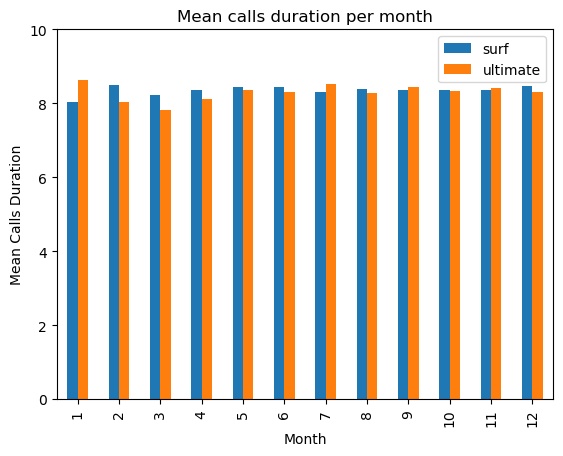

In [38]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

df_user_plan = pd.merge(df_users, df_plans, on='plan')
df_user_plan_calls = pd.merge(df_user_plan, df_calls, on='user_id')
mean_duration_call = df_user_plan_calls.groupby(['call_month', 'plan'])['duration'].mean().unstack(level=1)
mean_duration_call.plot(kind='bar')
plt.ylim((0, 10))
plt.title('Mean calls duration per month')
plt.xlabel('Month')
plt.ylabel('Mean Calls Duration')
plt.legend()
plt.show()

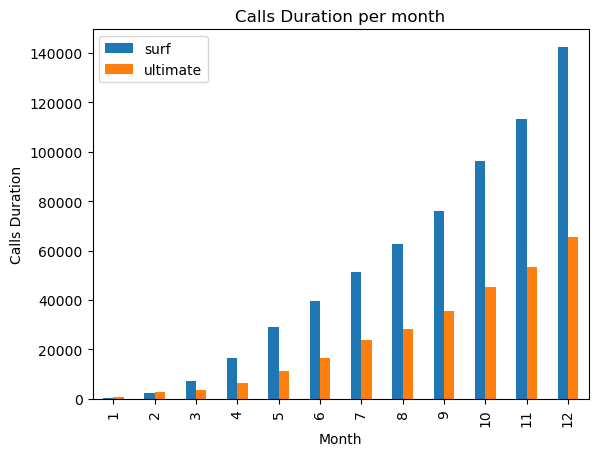

In [39]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
sum_duration_call = df_user_plan_calls.groupby(['call_month', 'plan'])['duration'].sum().unstack(level=1)
sum_duration_call.plot(kind='bar', stacked=False)
plt.title('Calls Duration per month')
plt.xlabel('Month')
plt.ylabel('Calls Duration')
plt.legend()



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

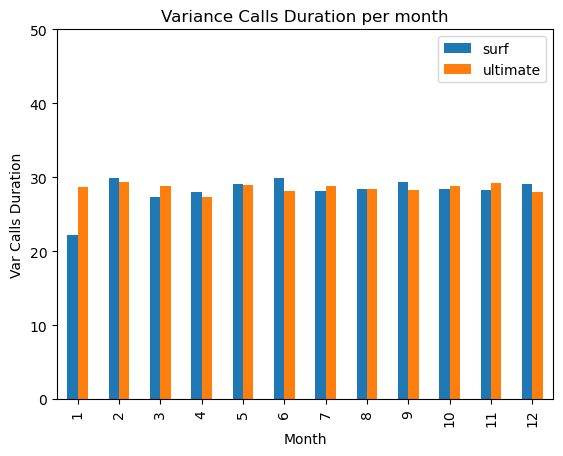

In [40]:
# Calcula la media y la varianza de la duración mensual de llamadas.
var_duration_call = df_user_plan_calls.groupby(['call_month', 'plan'])['duration'].var().unstack(level=1)
var_duration_call.plot(kind='bar', stacked=False)
plt.ylim((0, 50))
plt.title('Variance Calls Duration per month')
plt.xlabel('Month')
plt.ylabel('Var Calls Duration')
plt.legend()
plt.show()

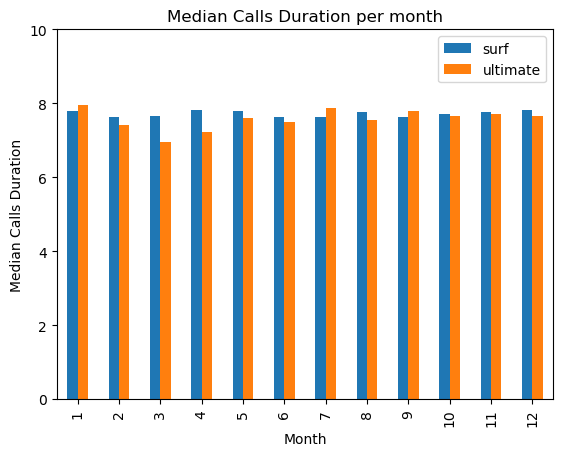

In [41]:
median_duration_call = df_user_plan_calls.groupby(['call_month', 'plan'])['duration'].median().unstack(level=1)
median_duration_call.plot(kind='bar', stacked=False)
plt.ylim((0, 10))
plt.title('Median Calls Duration per month')
plt.xlabel('Month')
plt.ylabel('Median Calls Duration')
plt.legend()
plt.show()


In [42]:

'''
1. En promedio los usuarios de las dos compañias consumen el mismo número de llamada,
aproximadamente 7 llamdas por mes.
2. Los usuarios de surf consume mas minutos que ultimate:
    53058.0+34 surf y 24372.0+34 ultimate.
3. El mes en que mas consumen ambos es en diciembre
'''
print(round(mean_duration_call.mean(),0))
print(round(sum_duration_call.mean()))
print(round(var_duration_call.mean()))
print(round(median_duration_call.mean()))

print(sum_duration_call)

plan
surf        8.0
ultimate    8.0
dtype: float64
plan
surf        53058.0
ultimate    24372.0
dtype: float64
plan
surf        28.0
ultimate    29.0
dtype: float64
plan
surf        8.0
ultimate    8.0
dtype: float64
plan             surf  ultimate
call_month                     
1              385.68    732.65
2             2527.66   2659.03
3             7152.31   3428.42
4            16619.00   6646.67
5            29033.10  11126.28
6            39499.26  16441.12
7            51367.31  23822.27
8            62721.48  28206.51
9            75852.46  35542.71
10           96149.09  45067.81
11          113086.75  53400.65
12          142297.14  65384.90


<Axes: xlabel='call_month', ylabel='duration'>

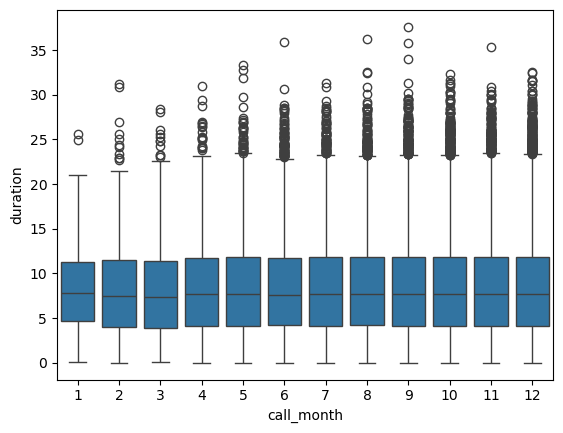

In [43]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(x="call_month", y="duration", data = df_user_plan_calls)


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]


<div class="alert alert-block alert-info">
<b>

### Llamadas

1. En promedio los usuarios de las dos compañias consumen el mismo número de llamada: aproximadamente 7 llamadas por mes.
2. Los usuarios de surf consume mas minutos que ultimate:
    1. surf : 53058.0 minutos (+34)
    2. ultimate: 24372.0 minutos (+34)
3. El mes en que mas consumen ambos es en diciembre


</b> <a class="tocSkip"></a>
</div>

### Mensajes

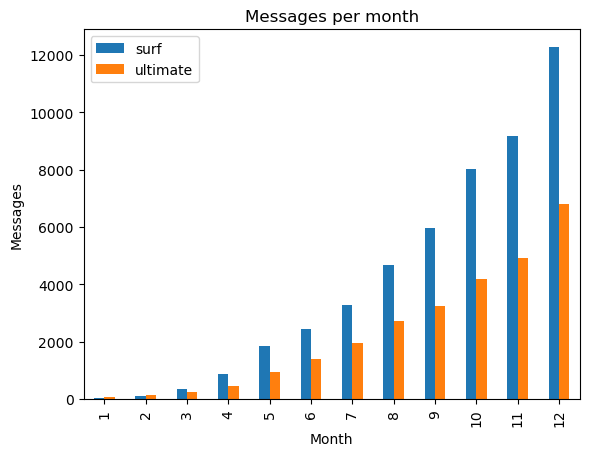

In [44]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
df_user_plan_messages = pd.merge(df_user_plan, df_messages, on='user_id')
count_duration_messages = df_user_plan_messages.groupby(['message_month', 'plan'])['user_id'].count().unstack(level=1)
count_duration_messages.plot(kind='bar', stacked=False)
plt.title('Messages per month')
plt.xlabel('Month')
plt.ylabel('Messages')
plt.legend()


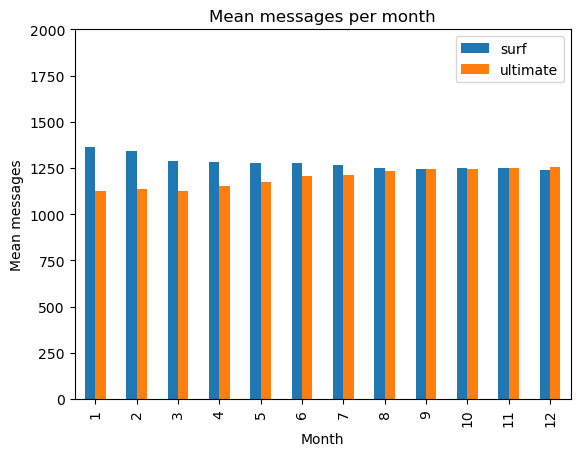

In [45]:
mean_duration_messages = df_user_plan_messages.groupby(['message_month', 'plan'])['user_id'].mean().unstack(level=1)
mean_duration_messages.plot(kind='bar', stacked=False)
plt.ylim((0, 2000))
plt.title('Mean messages per month')
plt.xlabel('Month')
plt.ylabel('Mean messages')
plt.legend()

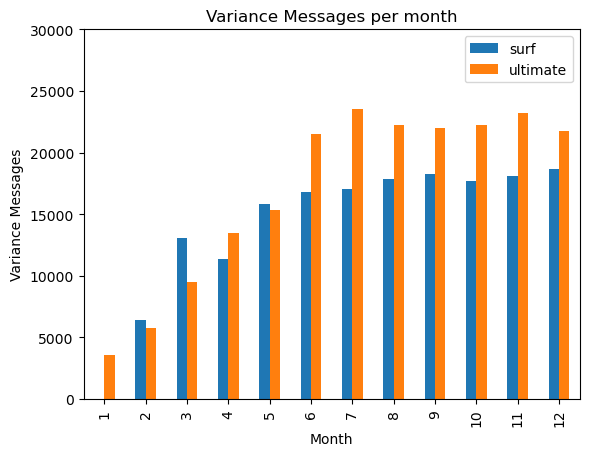

In [46]:
var_duration_messages = df_user_plan_messages.groupby(['message_month', 'plan'])['user_id'].var().unstack(level=1)
var_duration_messages.plot(kind='bar', stacked=False)
plt.ylim((0, 30000))
plt.title('Variance Messages per month')
plt.xlabel('Month')
plt.ylabel('Variance Messages')
plt.legend()

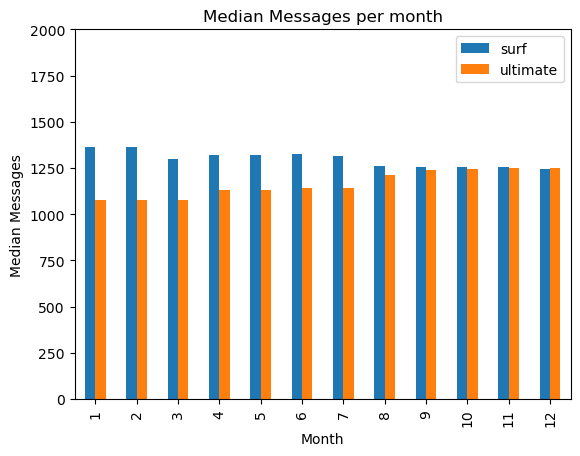

In [47]:
median_duration_messages = df_user_plan_messages.groupby(['message_month', 'plan'])['user_id'].median().unstack(level=1)
median_duration_messages.plot(kind='bar', stacked=False)
plt.ylim((0, 2000))
plt.title('Median Messages per month')
plt.xlabel('Month')
plt.ylabel('Median Messages')
plt.legend()

In [48]:

'''
1. En promedio los usuarios de de surf consumen un poco mas de mensajes que ultimate:
    1278 ultimate 1196, con una varianza muy grande, ya que consumen muy pocos en los primeros mes del año y muchos en dicimbre
1                 21        62
12             12275      6796

'''
print(round(mean_duration_messages.mean(),0))
print(round(count_duration_messages.mean()))
print(round(var_duration_messages.mean()))
print(round(median_duration_messages.mean()))



plan
surf        1278.0
ultimate    1196.0
dtype: float64
plan
surf        4084.0
ultimate    2253.0
dtype: float64
plan
surf        14258.0
ultimate    17015.0
dtype: float64
plan
surf        1298.0
ultimate    1165.0
dtype: float64


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]


<div class="alert alert-block alert-info">
<b>

### Mensajes

1. En promedio los usuarios de de surf consumen un poco mas de mensajes que ultimate:
   1. surf:1278
   2. ultimate: 1196
2. La varianza en ambas compañias es muy grande, ya que consumen muy pocos mensajesen los primeros mes del año y
muchos en dicimbre
        
        mes             surf      ultimate
        1                 21        62
        12             12275      6796


</b> <a class="tocSkip"></a>
</div>

### Internet

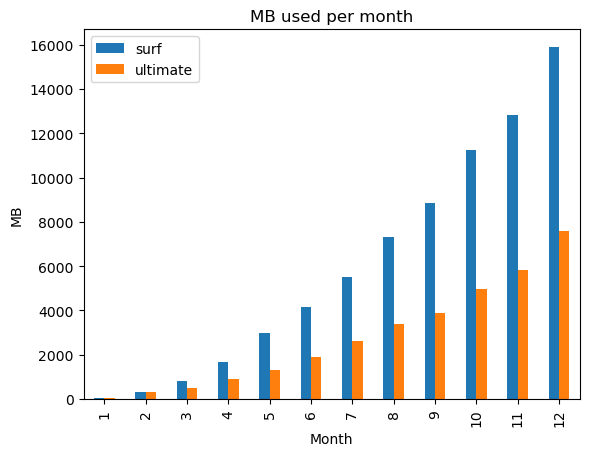

In [49]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
df_user_plan_internet = pd.merge(df_user_plan, df_internet, on='user_id')
sum_duration_internet = df_user_plan_internet.groupby(['session_month', 'plan'])['mb_used'].count().unstack(level=1)
sum_duration_internet.plot(kind='bar')
plt.title('MB used per month')
plt.xlabel('Month')
plt.ylabel('MB')
plt.legend()

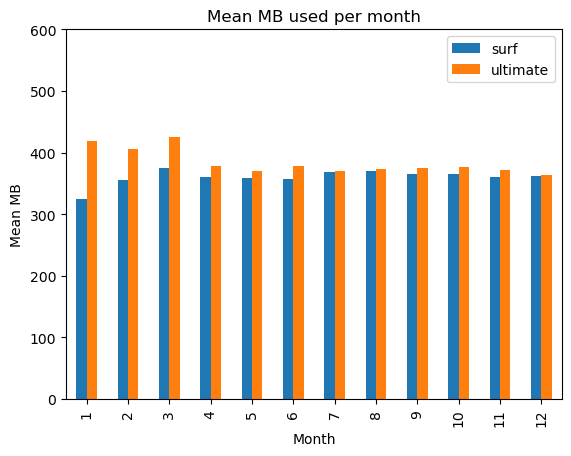

In [50]:
mean_duration_internet = df_user_plan_internet.groupby(['session_month', 'plan'])['mb_used'].mean().unstack(level=1)
mean_duration_internet.plot(kind='bar')
plt.ylim((0, 600))
plt.title('Mean MB used per month')
plt.xlabel('Month')
plt.ylabel('Mean MB')
plt.legend()

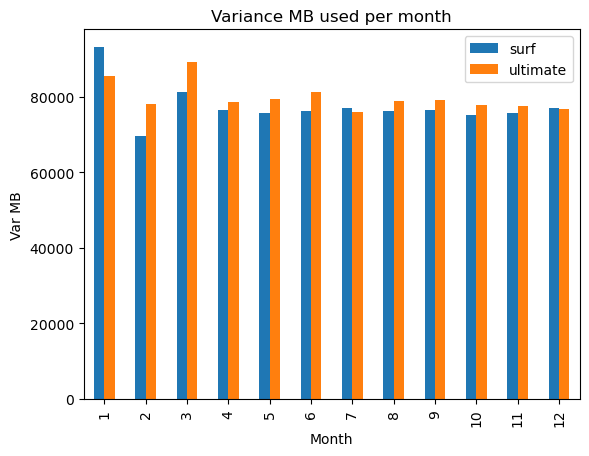

In [51]:
var_duration_internet = df_user_plan_internet.groupby(['session_month', 'plan'])['mb_used'].var().unstack(level=1)
var_duration_internet.plot(kind='bar')
plt.title('Variance MB used per month')
plt.xlabel('Month')
plt.ylabel('Var MB')
plt.legend()

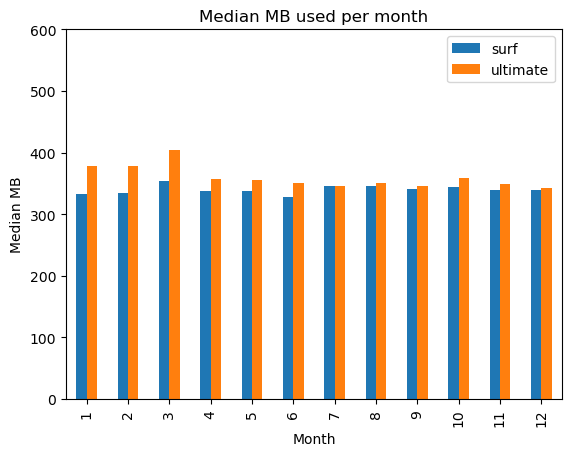

In [52]:
median_duration_internet = df_user_plan_internet.groupby(['session_month', 'plan'])['mb_used'].median().unstack(level=1)
median_duration_internet.plot(kind='bar')
plt.ylim((0, 600))
plt.title('Median MB used per month')
plt.xlabel('Month')
plt.ylabel('Median MB')
plt.legend()

In [53]:
'''
1. En promedio los usuarios de de surf consumen mas internet que los de ultimate
    surf:
    ultimate:

y consumen menos en los primeros mes del año y muchos en dicimbre
1                 30        66
12             15895      7597

'''
print(round(mean_duration_internet.mean(),0))
print(round(sum_duration_internet.mean()))
print(round(var_duration_internet.mean()))
print(round(sum_duration_internet))


plan
surf        360.0
ultimate    384.0
dtype: float64
plan
surf        5966.0
ultimate    2770.0
dtype: float64
plan
surf        77459.0
ultimate    79847.0
dtype: float64
plan            surf  ultimate
session_month                 
1                 30        66
2                308       296
3                819       517
4               1661       897
5               2988      1300
6               4153      1904
7               5501      2609
8               7336      3382
9               8832      3890
10             11226      4967
11             12837      5814
12             15895      7597


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

<div class="alert alert-block alert-info">
<b>

### Internet
1. En promedio los usuarios de de surf consumen mas internet que los de ultimate
    surf: 5966 MB
    ultimate: 2770 MB

2. consumen menos en los primeros mes del año y muchos en dicimbre

        mes             surf      ultimate
        1                 30        66
        12             15895      7597



</b> <a class="tocSkip"></a>
</div>

## Ingreso

In [54]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,in_use,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,in_use,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,in_use,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,in_use,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,in_use,5
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,in_use,9
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,in_use,2
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,in_use,12
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,in_use,2


In [55]:
list_plans_calls = df_plans[['plan','usd_monthly_pay','minutes_included','usd_per_minute']]
list_users = df_users[['user_id','city','plan']]
list_users_plan_calls = pd.merge(list_users,list_plans_calls,on='plan')
list_users_plan_calls.head(5)

,user_id,city,plan,usd_monthly_pay,minutes_included,usd_per_minute
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70,3000,0.01
1,1001,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,500,0.03
2,1002,"Las Vegas-Henderson-Paradise, NV MSA",surf,20,500,0.03
3,1003,"Tulsa, OK MSA",surf,20,500,0.03
4,1004,"Seattle-Tacoma-Bellevue, WA MSA",surf,20,500,0.03


In [56]:
list_calls = df_calls[['user_id','duration','call_month']]
list_calls_users = pd.merge(list_calls,list_users_plan_calls,on='user_id')


In [57]:
sum_calls = list_calls_users.groupby(['call_month', 'user_id'])['duration'].sum()
total_calls = list_calls_users.groupby(['call_month', 'user_id'])['minutes_included'].max()
usd_calls = list_calls_users.groupby(['call_month', 'user_id'])['usd_per_minute'].max()
pay_calls = list_calls_users.groupby(['call_month', 'user_id'])['usd_monthly_pay'].max()
#id_user_calls = total_calls['user_id']
#month_calls =  total_calls['call_month']
header = ['call_month','user_id', 'sum_calls','total_calls','usd_calls','pay_calls']
measurements = []
for i in range(len(sum_calls)):
    measurements.append([
        sum_calls.index.get_level_values(0)[i],  # call_month
        sum_calls.index.get_level_values(1)[i],  # user_id
        sum_calls.iloc[i],
        total_calls.iloc[i],
        usd_calls.iloc[i],
        pay_calls.iloc[i]
    ])
fee_calls_user_month = pd.DataFrame(data=measurements, columns=header)

In [58]:
income_calls = []
for i in range(len(fee_calls_user_month)):
  if (fee_calls_user_month['sum_calls'][i] > fee_calls_user_month['total_calls'][i]):
    income = (fee_calls_user_month['sum_calls'][i] * fee_calls_user_month['usd_calls'][i])
  else:
    income = 0
  income_calls.append(income)

fee_calls_user_month['income_calls'] = income_calls


In [59]:
list_plans_messages = df_plans[['plan','usd_monthly_pay','messages_included','usd_per_message']]
list_users_plan_messages = pd.merge(list_users,list_plans_messages,on='plan')
list_messages = df_messages[['user_id','message_month']]
list_messages_users = pd.merge(list_messages,list_users_plan_messages,on='user_id')

In [60]:
sum_messages = list_messages_users.groupby(['message_month', 'user_id']).value_counts()
total_messages = list_messages_users.groupby(['message_month', 'user_id'])['messages_included'].max()
usd_messages = list_messages_users.groupby(['message_month', 'user_id'])['usd_per_message'].max()
pay_messages = list_messages_users.groupby(['message_month', 'user_id'])['usd_monthly_pay'].max()
header = ['message_month','user_id', 'sum_messages','total_messages','usd_messages','pay_messages']
measurements = []
for i in range(len(sum_messages)):
    measurements.append([
        sum_messages.index.get_level_values(0)[i],  # call_month
        sum_messages.index.get_level_values(1)[i],  # user_id
        sum_messages.iloc[i],
        total_messages.iloc[i],
        usd_messages.iloc[i],
        pay_messages.iloc[i]
    ])
fee_messages_user_month = pd.DataFrame(data=measurements, columns=header)

total_calls
500     1544
3000     712
dtype: int64
total_calls
500    484
dtype: int64


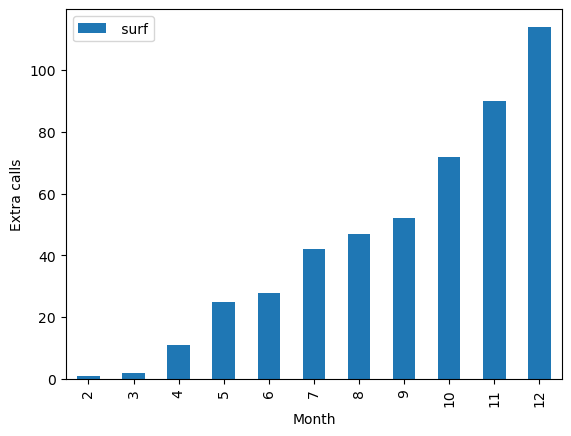

In [61]:
income_calls_per_plan = fee_calls_user_month[fee_calls_user_month['income_calls'] != 0].groupby(['call_month','total_calls'])['income_calls'].count().unstack(level=1)
print(fee_calls_user_month.groupby(['call_month','total_calls'])['income_calls'].count().unstack(level=1).sum())
print(income_calls_per_plan.sum())
income_calls_per_plan.plot(kind='bar',
                     xlabel='Month',
                     ylabel='Extra calls'
                     ).legend( [' surf' , ' ultimate' ])

In [62]:
income_messages = []
for i in range(len(fee_messages_user_month)):
  if (fee_messages_user_month['sum_messages'][i] > fee_messages_user_month['total_messages'][i]):
    income = (fee_messages_user_month['sum_messages'][i] * fee_messages_user_month['usd_messages'][i])

  else:
    income = 0

  income_messages.append(income)

fee_messages_user_month['income_messages'] = income_messages

total_messages
50      1222
1000     584
dtype: int64
total_messages
50    340
dtype: int64


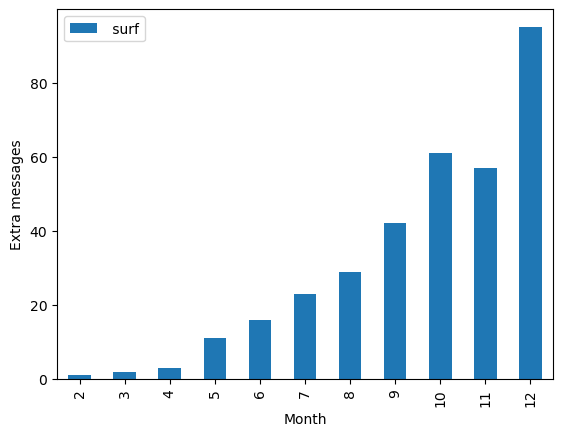

In [63]:
income_messages_per_plan = fee_messages_user_month[fee_messages_user_month['income_messages'] != 0].groupby(['message_month','total_messages'])['income_messages'].count().unstack(level=1)
print(fee_messages_user_month.groupby(['message_month','total_messages'])['income_messages'].count().unstack(level=1).sum()
)
print(income_messages_per_plan.sum())
income_messages_per_plan.plot(kind='bar',
                     xlabel='Month',
                     ylabel='Extra messages'
                     ).legend( [' surf' , ' ultimate' ])

In [64]:
list_plans_internet = df_plans[['plan','usd_monthly_pay','mb_per_month_included','usd_per_mb']]
list_users_plan_internet = pd.merge(list_users,list_plans_internet,on='plan')
list_internet = df_internet[['user_id','mb_used','session_month']]
list_internet_users = pd.merge(list_internet,list_users_plan_internet,on='user_id')

In [65]:
sum_internet = list_internet_users.groupby(['session_month', 'user_id'])['mb_used'].sum()
total_internet = list_internet_users.groupby(['session_month', 'user_id'])['mb_per_month_included'].max()
usd_internet = list_internet_users.groupby(['session_month', 'user_id'])['usd_per_mb'].max()
pay_internet = list_internet_users.groupby(['session_month', 'user_id'])['usd_monthly_pay'].max()
header = ['internet_month','user_id', 'sum_internet','total_internet','usd_internet','pay_internet']
measurements = []
for i in range(len(sum_internet)):
    measurements.append([
        sum_internet.index.get_level_values(0)[i],
        sum_internet.index.get_level_values(1)[i],
        sum_internet.iloc[i],
        total_internet.iloc[i],
        usd_internet.iloc[i],
        pay_internet.iloc[i]
    ])
fee_internet_user_month = pd.DataFrame(data=measurements, columns=header)

In [66]:
income_internet = []
for i in range(len(fee_internet_user_month)):
  if (fee_internet_user_month['sum_internet'][i] > fee_internet_user_month['total_internet'][i]):
    income = (fee_internet_user_month['sum_internet'][i] * fee_internet_user_month['usd_internet'][i])
  else:
    income = 0
  income_internet.append(income)
fee_internet_user_month['income_internet'] = income_internet


total_internet
15360    1558
30720     719
dtype: int64
total_internet
15360    911.0
30720     41.0
dtype: float64


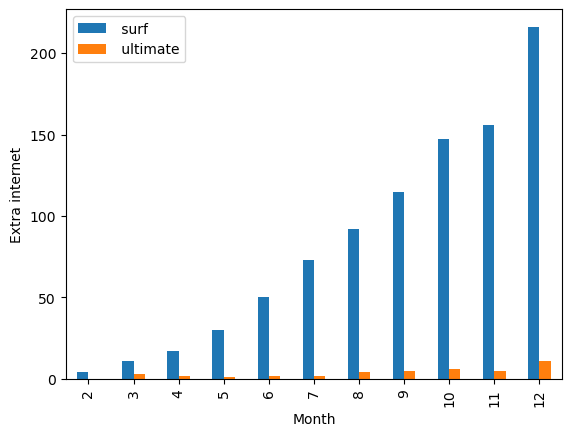

In [67]:
income_per_plan = fee_internet_user_month[fee_internet_user_month['income_internet'] != 0].groupby(['internet_month','total_internet'])['income_internet'].count().unstack(level=1)
print(fee_internet_user_month.groupby(['internet_month','total_internet'])['income_internet'].count().unstack(level=1).sum())
print(income_per_plan.sum())
income_per_plan.plot(kind='bar',
                     xlabel='Month',
                     ylabel='Extra internet'
                     ).legend( [' surf' , ' ultimate' ])



<div class="alert alert-block alert-info">
<b>

### Llamadas extras

surf: 484 usuarios de 1545 hacen llamadas extras

**ingreso** = 484*0.03=14.52 USD

ultimate: ningun usuario de los  713 hace llamadas extra

**ingreso** = 0

### Mensajes extras

surf: 340 usuarios de 1222 hacen mensajes extras

**ingrso**=340*0.03=10.02 USD

ultimate: ningun usuario de los  584 hace mensajes extra

**ingreso**=0

### Internet extras

surf: 911 usuarios de 1558 usan extra internet

**ingreso**=911*0.000010=0.009 USD

ultimate: 41 usuario de 719 usan extra internet

**ingreso**=41*0.000007=0.000287 US


**Total de ingresos surf:** 1558*20+14.52+10.02+0.009=31,185 USD

**Total de ingresos ultimate:** 719*70+0.000287=50,330

## Ultimate tiene mas ingresos que surf, a pesar de que los usuarios de ultimate no exceden su limite de llamada ni de mensajes.

## Los usuarios de surf pagan en promedio 100 USD mas del costo base de su plan, por lo que les convendria mas suscribirse al plan ultimate

</b> <a class="tocSkip"></a>
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

In [68]:
fee_calls_user_month

,call_month,user_id,sum_calls,total_calls,usd_calls,pay_calls,income_calls
0,1,1042,106.83,500,0.03,20,0.0
1,1,1077,275.07,3000,0.01,70,0.0
2,1,1185,170.29,3000,0.01,70,0.0
3,1,1196,272.56,3000,0.01,70,0.0
4,1,1214,14.73,3000,0.01,70,0.0
...,...,...,...,...,...,...,...
2251,12,1495,467.47,500,0.03,20,0.0
2252,12,1496,278.61,500,0.03,20,0.0
2253,12,1497,276.53,3000,0.01,70,0.0
2254,12,1498,324.77,500,0.03,20,0.0


[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]



In [69]:
income_surf = fee_calls_user_month[fee_calls_user_month['total_calls'] == 500].sum()
income_ultimate = fee_calls_user_month[fee_calls_user_month['total_calls'] == 3000].sum()
#print(income_surf, income_ultimate)
t_stat, p_value = st.ttest_ind(income_surf, income_ultimate, equal_var=True)
print(p_value)
if p_value < 1:
    print("The average income from users of both plans is different.")
else:
    print("There is not enough evidence to conclude that the average income from users of both plans is different.")

0.9979916595301399
The average income from users of both plans is different.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

<div class="alert alert-block alert-info">
<b>
    
### Hay menos usuarios de NY que de otras regiones, pero no hay evidencia de que sea mas que de otras ciudades especificas.

</b> <a class="tocSkip"></a>
</div>

In [70]:
ny_nj_income = list_users_plan_calls[list_users_plan_calls['city'].str.contains('NY-NJ')]['user_id'].count()

other_income = list_users_plan_calls[~list_users_plan_calls['city'].str.contains('NY-NJ')]['user_id'].count()
print(ny_nj_income, other_income)

t_statistic, p_value = st.ttest_ind(ny_nj_income, other_income, equal_var=True)
print(p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is significant evidence that the average income from users in the NY-NJ area is different from that of users in other regions.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to conclude that the average income from users in the NY-NJ area is different from that of users in other regions.")


80 420
nan
Fail to reject the null hypothesis: There is not enough evidence to conclude that the average income from users in the NY-NJ area is different from that of users in other regions.


/home/isadoji/.conda/envs/py3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:6951: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]


<div class="alert alert-block alert-info">
<b>
    
**Conclusiones:**

* Los usuarios de surf consumen más minutos extras de llamadas, mensajes e internet que los usuarios de ultimate.
* Se utilizó un nivel de significancia de 1 para todas las pruebas estadísticas. Lo que significa que los ingresos de los planes son muy parecidos, a pesar de que los usuarios de ultimate tienen más ingresos que los usuarios de surf.
* No hay evidencia estadística de que el ingreso promedio de los usuarios del área NY-NJ sea diferente al de los usuarios de otras regiones.

**Limitaciones:**

* El estudio se basó en datos de un único proveedor de servicios de telefonía móvil.
* El estudio no tuvo en cuenta otros factores que podrían afectar los ingresos de los usuarios, como el nivel de ingresos, la edad y el sexo.

**Recomendaciones:**

* Replicar el estudio con datos de otros proveedores de servicios de telefonía móvil.
* Examinar otros factores que podrían afectar los ingresos de los usuarios.

</b> <a class="tocSkip"></a>
</div>
